In [1]:
import tqdm

import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import numpy as np

jax.config.update(
  'jax_enable_x64', True
)

import flax
import flax.linen as nn
from flax.training import train_state
import optax

# "Physics-based" learning with hybrid solver/model: subgrid-scale correction

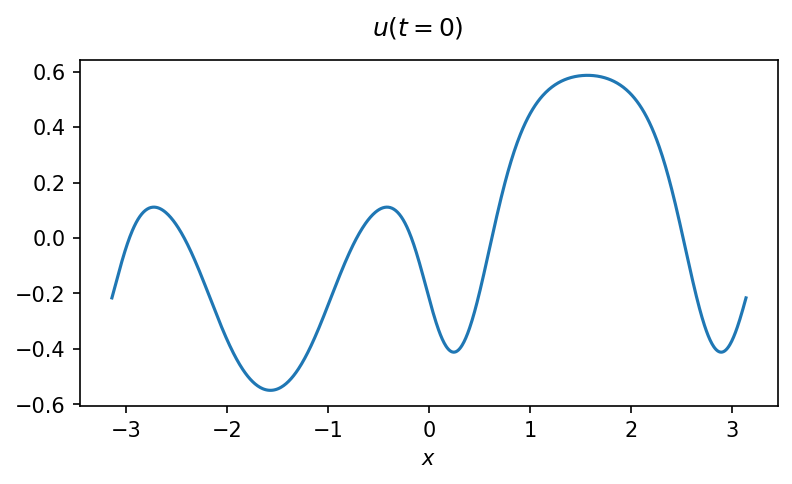

In [2]:
N_x = 1024
x = np.linspace(-np.pi, np.pi, N_x)
m = np.fft.rfftfreq(N_x, d=1/N_x)

def fwd(u):
  return np.fft. rfft(u, norm='forward')
def bwd(u):
  return np.fft.irfft(u, norm='forward')
def burgers_explicit(u):
  du = u * 1j * m
  udu = fwd(bwd(u) * bwd(du))
  return udu
def burgers_implicit(u):
  return nu * u * (1j * m)**2

_imex2_ɣ = 0.5 * (2.0 - np.sqrt(2))
_imex2_δ = 1.0 - 0.5 / _imex2_ɣ

def step(ut, i_inv, dt):
  g0 = burgers_explicit(ut)
  us = i_inv * (ut + dt * _imex2_ɣ * g0)
  a1 = burgers_implicit(us)
  g1 = burgers_explicit(us)
  us = i_inv * (ut + dt * (_imex2_δ * g0 + (1 - _imex2_δ) * g1) + dt * (1 - _imex2_ɣ) * a1)
  return us

nu = 1e-2
dt = 1e-4
i_inv = 1.0 / (1.0 - dt * _imex2_ɣ * burgers_implicit(np.ones_like(m)))

u0 = np.tanh(np.cos(1 + 2*np.sin(x))**2) + np.sin(x)/3 - 0.5
#u0 = np.exp(-x**2)

fig, axs = plt.subplots(figsize=(6,3), dpi=150)
axs.plot(x, u0)
axs.set_xlabel(r'$x$')
fig.suptitle(r'$u(t = 0)$')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 12987.61it/s]


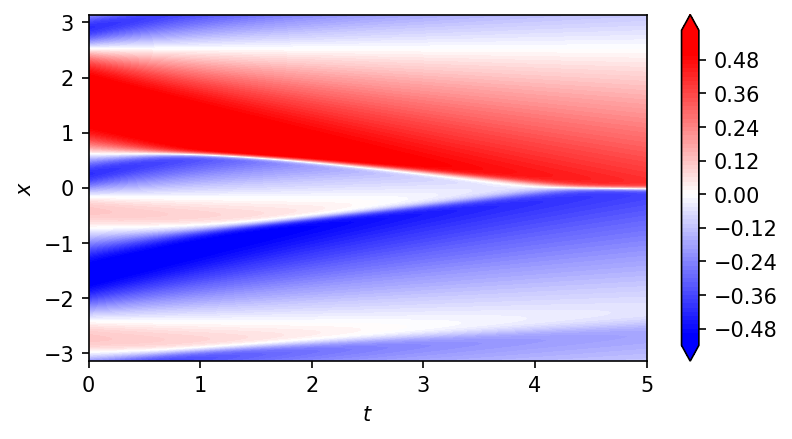

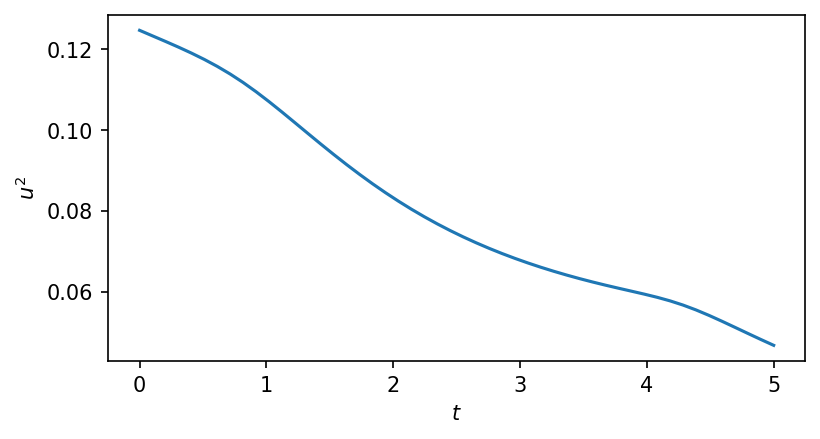

In [3]:
N_t = 50
n_iters = 50000
freq = int(n_iters / N_t)

traj_u = np.zeros((N_t, N_x)) # state u
traj_e = np.zeros(N_t) # integral u^2

ut = fwd(u0)
for i in tqdm.tqdm(range(n_iters)):
  ut = step(ut, i_inv, dt)
  if i % freq == 0:
    i_sample = int(i / freq)
    traj_u[i_sample] = bwd(ut)
    traj_e[i_sample] = ut[0].real**2 + 2*np.sum(ut[1:].real**2 + ut[1:].imag**2)

t = np.linspace(0, n_iters, N_t) * dt

fig, axs = plt.subplots(figsize=(6,3), dpi=150)
fig.colorbar(axs.contourf(t, x, traj_u.T, levels=100, vmin=-0.5, vmax=0.5, extend='both', cmap='bwr'), ax=axs)
axs.set_xlabel(r'$t$')
axs.set_ylabel(r'$x$')

fig, axs = plt.subplots(figsize=(6,3), dpi=150)
axs.plot(t, traj_e)
axs.set_xlabel(r'$t$')
axs.set_ylabel(r'$u^2$')

plt.show()

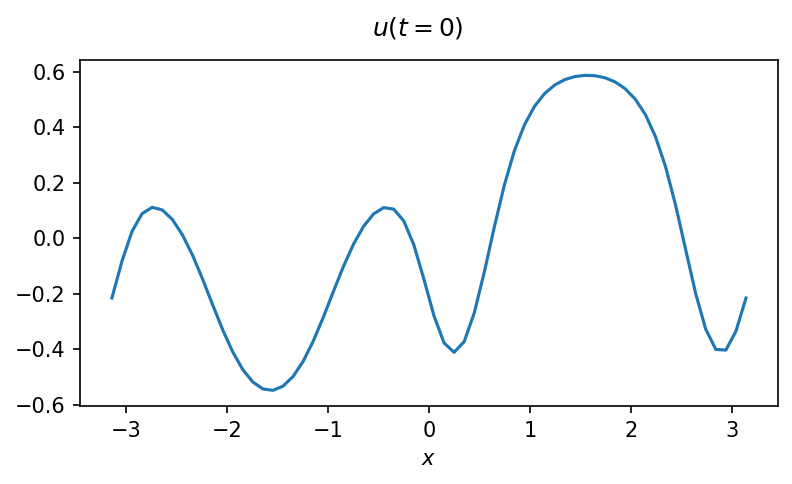

In [4]:
N_x = 64
x = np.linspace(-np.pi, np.pi, N_x)
m = np.fft.rfftfreq(N_x, d=1/N_x)

def fwd(u):
  return np.fft. rfft(u, norm='forward')
def bwd(u):
  return np.fft.irfft(u, norm='forward')
def burgers_explicit(u):
  du = u * 1j * m
  udu = fwd(bwd(u) * bwd(du))
  return udu
def burgers_implicit(u):
  return nu * u * (1j * m)**2

_imex2_ɣ = 0.5 * (2.0 - np.sqrt(2))
_imex2_δ = 1.0 - 0.5 / _imex2_ɣ

def step(ut, i_inv, dt):
  g0 = burgers_explicit(ut)
  us = i_inv * (ut + dt * _imex2_ɣ * g0)
  a1 = burgers_implicit(us)
  g1 = burgers_explicit(us)
  us = i_inv * (ut + dt * (_imex2_δ * g0 + (1 - _imex2_δ) * g1) + dt * (1 - _imex2_ɣ) * a1)
  return us

nu = 1e-2
dt = 1e-4
i_inv = 1.0 / (1.0 - dt * _imex2_ɣ * burgers_implicit(np.ones_like(m)))

u0 = np.tanh(np.cos(1 + 2*np.sin(x))**2) + np.sin(x)/3 - 0.5
#u0 = np.exp(-x**2)

fig, axs = plt.subplots(figsize=(6,3), dpi=150)
axs.plot(x, u0)
axs.set_xlabel(r'$x$')
fig.suptitle(r'$u(t = 0)$')
plt.show()

 28%|█████████████████████████████████████████████▊                                                                                                                       | 13885/50000 [00:00<00:01, 27771.30it/s]/tmp/ipykernel_1686043/2155067988.py:11: RuntimeWarning: overflow encountered in multiply
  udu = fwd(bwd(u) * bwd(du))
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 27242.27it/s]


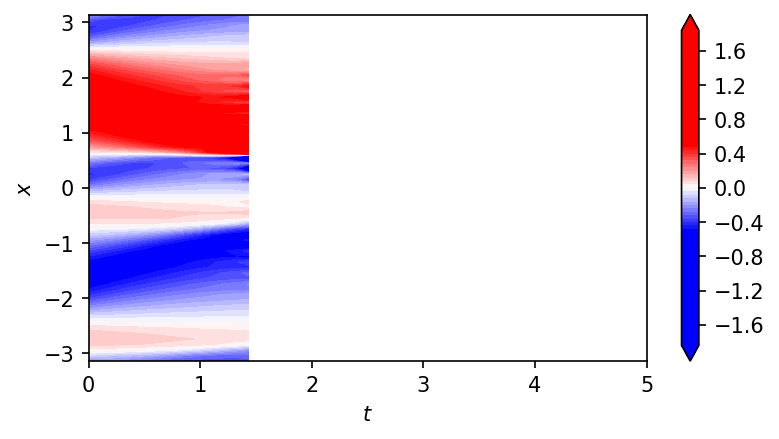

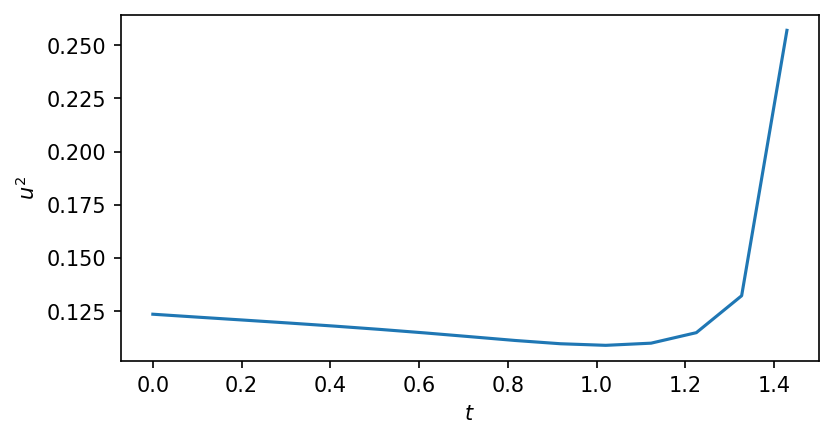

In [5]:
N_t = 50
n_iters = 50000
freq = int(n_iters / N_t)

traj_u = np.zeros((N_t, N_x)) # state u
traj_e = np.zeros(N_t) # integral u^2

ut = fwd(u0)
for i in tqdm.tqdm(range(n_iters)):
  ut = step(ut, i_inv, dt)
  if i % freq == 0:
    i_sample = int(i / freq)
    traj_u[i_sample] = bwd(ut)
    traj_e[i_sample] = ut[0].real**2 + 2*np.sum(ut[1:].real**2 + ut[1:].imag**2)

t = np.linspace(0, n_iters, N_t) * dt

fig, axs = plt.subplots(figsize=(6,3), dpi=150)
fig.colorbar(axs.contourf(t, x, traj_u.T, levels=100, vmin=-0.5, vmax=0.5, extend='both', cmap='bwr'), ax=axs)
axs.set_xlabel(r'$t$')
axs.set_ylabel(r'$x$')

fig, axs = plt.subplots(figsize=(6,3), dpi=150)
axs.plot(t, traj_e)
axs.set_xlabel(r'$t$')
axs.set_ylabel(r'$u^2$')

plt.show()